<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labourious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.
Is this guy going to donate blood in march 2007 or not?
## Actual Question
Choose the **one** question that should be answered.
Is this guy going to donate blood in march 2007 or not?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [25]:
## Import Libraries

import itertools
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets
import seaborn as sns

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions



In [26]:

iris = datasets.load_iris()

# picking just the first two features
X = iris.data[:, 0:2]
# target
y = iris.target

In [27]:
## Check the data

# About data
print(X.shape)
print(X[:5])

(150, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [28]:
# About target
print(y.shape)
print(y[:5])

(150,)
[0 0 0 0 0]


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float

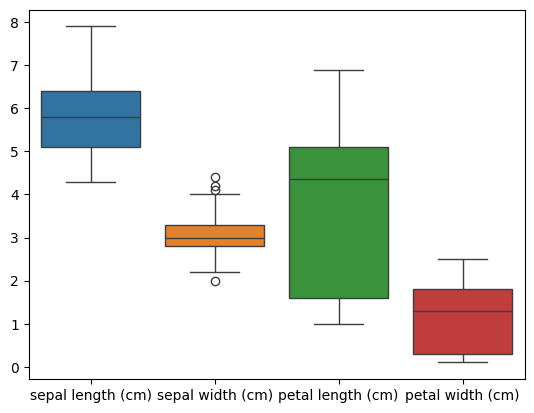

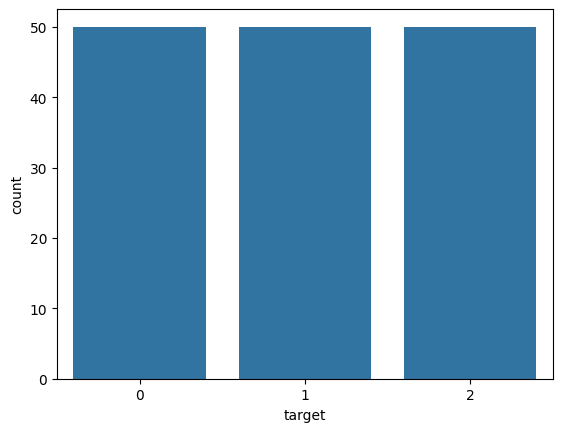

In [29]:
# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first few rows of the dataset
print(df.head())

# Basic information about the dataset
print(df.info())

# Statistical summary of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check for outliers using boxplots
sns.boxplot(data=df.iloc[:, :-1])
plt.show()

# Distribution of the target variable
sns.countplot(x='target', data=df)
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features and target
X = df.iloc[:, :-1]
y = df['target']

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features and target
X = df.iloc[:, :-1]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = classifier.predict(X_train)

# Make predictions on the testing data
y_test_pred = classifier.predict(X_test)

# Evaluate the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

print(f'Training Accuracy: {train_accuracy}')
print('Training Classification Report:')
print(train_report)
print('Training Confusion Matrix:')
print(train_confusion_matrix)

# Evaluate the model on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')
print(test_report)
print('Test Confusion Matrix:')
print(test_confusion_matrix)


Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Training Confusion Matrix:
[[31  0  0]
 [ 0 37  0]
 [ 0  0 37]]
Test Accuracy: 1.0
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Test Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Step 7: Split the Data  - AS ABOVE

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

# Step 8: Define a Model -  - AS ABOVE

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

# Step 9: Fit the Model -  - AS ABOVE

# Step 10: Verify and Evaluate the Training Model -  - AS ABOVE
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 11: Make Predictions and Evaluate the Test Model -  - AS ABOVE
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

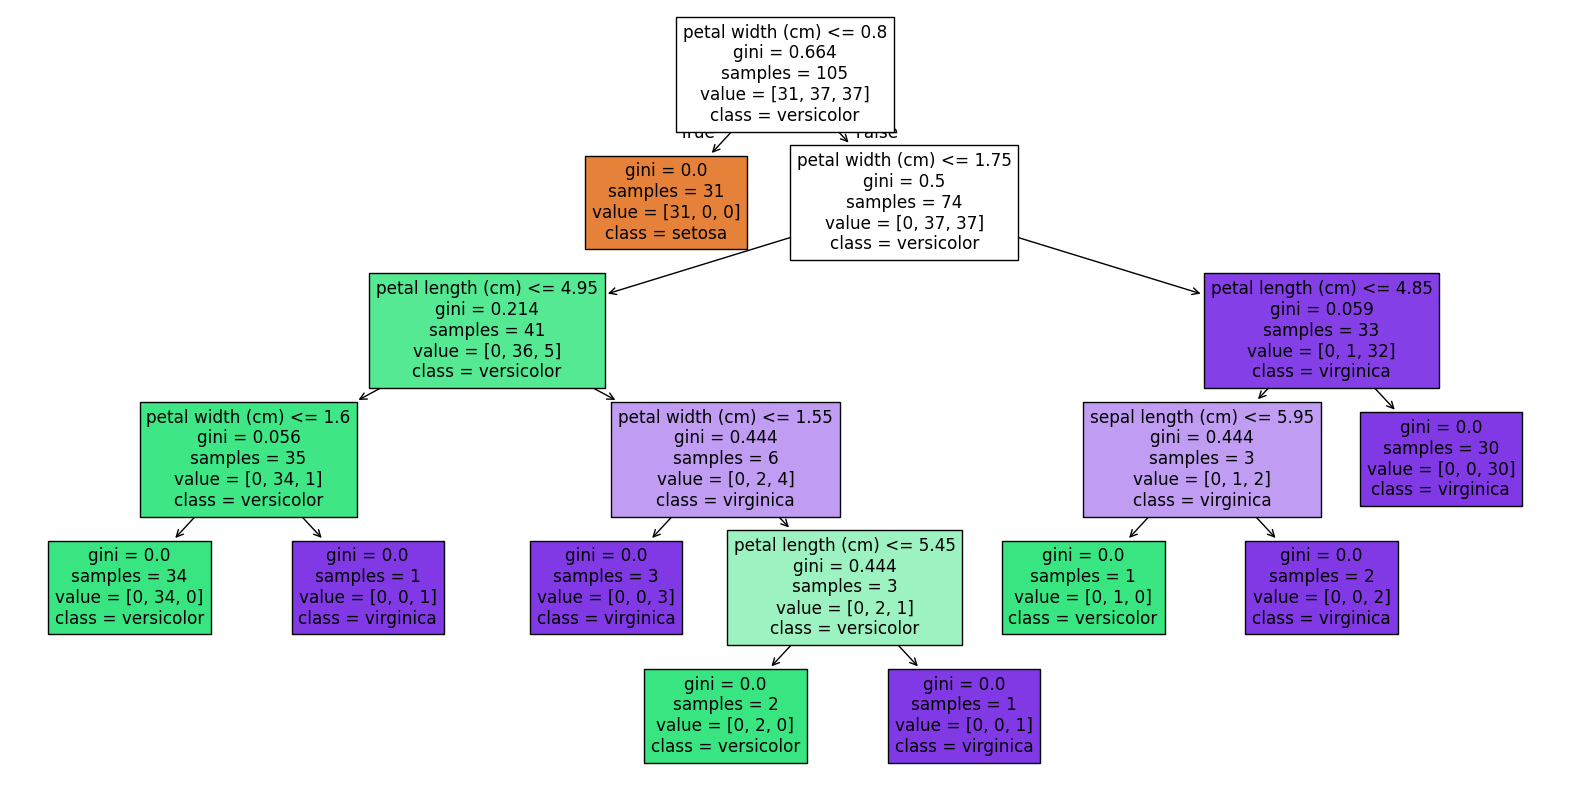

In [32]:
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



